#Paper-4:Multi-Class Stress Detection Through Heart RateVariability: A Deep Neural Network Based StudyMulti-Class Stress Detection Through Heart RateVariability: A Deep Neural Network Based Study
Analysis Goals:
Here, we implement the approach described in Paper 4 using the SWELL-KW dataset. In this notebook, we aim to predict stress levels using an ID CNN. This method helps classify stress conditions based on features derived from the dataset.

*paper link:https://drive.google.com/drive/folders/1gBR6a7Um-6h0cFJkS9V4dH7ZwPGzn_xA

*Dataset link:https://www.kaggle.com/datasets/qiriro/swell-heart-rate-variability-hrv

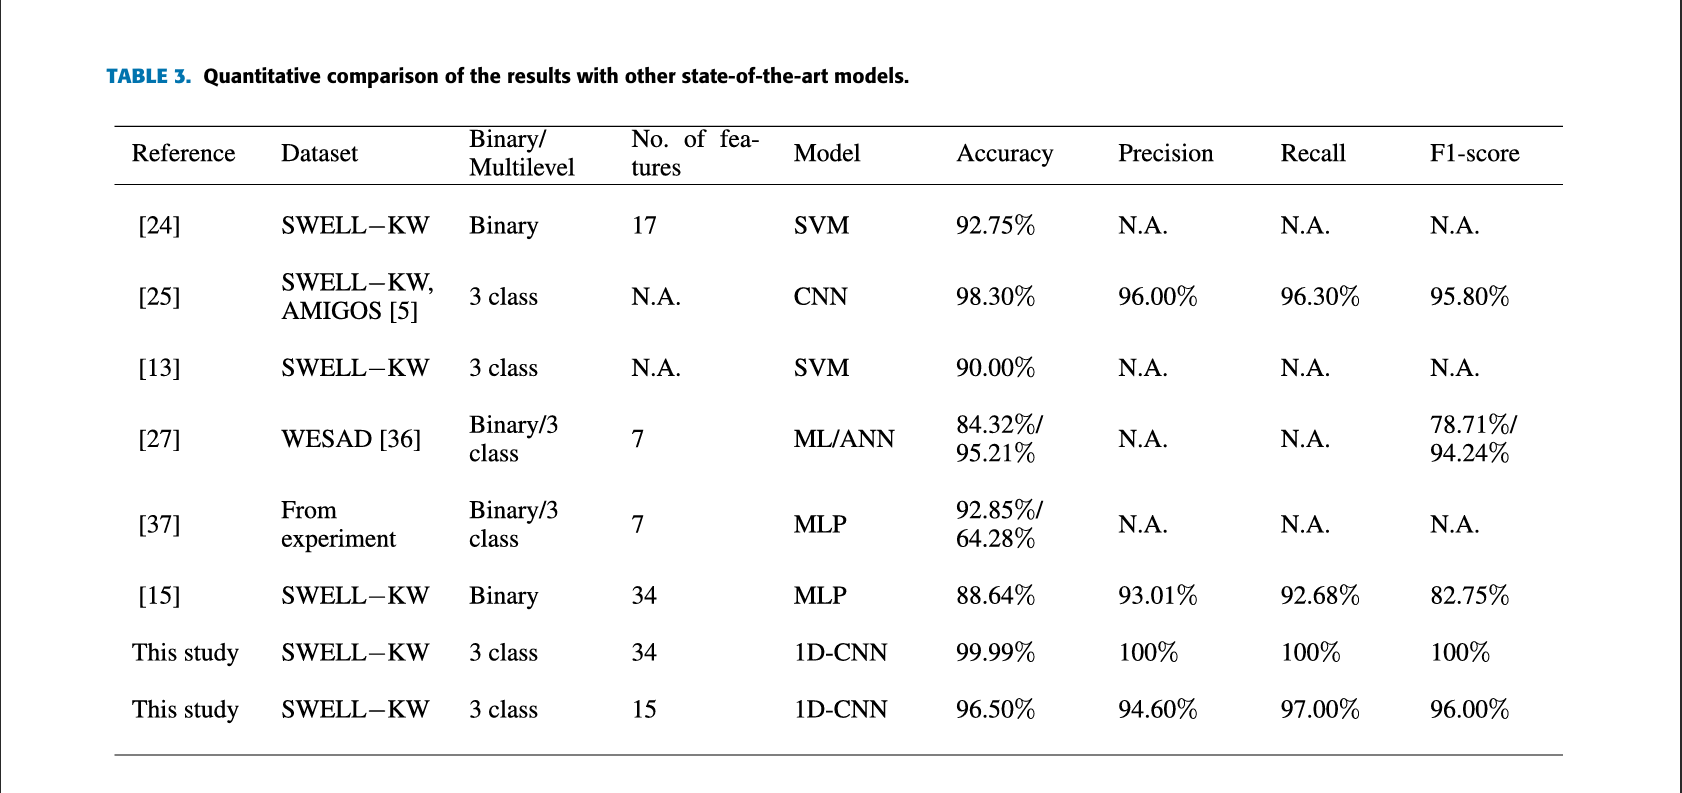

#Load the dataset

In [1]:
#for data manipulation and analysis
import pandas as pd
#for numerical compution
import numpy as np
#for data visualizations
import matplotlib.pyplot as plt
#
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_heart.csv')

#Data Inspection

In [4]:
# Display the first 10 rows of the dataframe
df.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822093,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
5,831.632294,836.596795,62.069042,12.576667,12.576557,4.935254,72.562697,4.533333,0.266667,8.895937,...,27.517012,1.280470,4.480715,2148.978043,21.317867,0.046909,2.177956,1.202543,2,time pressure
6,832.894819,834.290000,84.999202,14.147805,14.147257,6.007943,72.816960,7.400000,0.000000,10.006960,...,14.771837,0.594187,1.536975,2486.058114,64.062874,0.015610,2.186655,1.183980,2,interruption
7,719.439761,717.521215,57.971358,9.350848,9.350507,6.199583,83.951285,1.666667,0.133333,6.614013,...,34.518960,2.195016,8.979104,1572.606599,10.136969,0.098649,2.195558,1.192361,2,no stress
8,997.711161,998.858135,80.215509,22.116768,22.116729,3.626909,60.537570,26.866667,1.933333,15.644108,...,8.956415,0.245826,0.519306,3643.391597,191.564789,0.005220,2.197198,1.224772,2,interruption
9,751.381602,760.687035,88.536256,13.999524,13.998405,6.324233,81.125490,6.733333,0.600000,9.901671,...,32.101300,0.996415,3.079247,3221.680332,31.475473,0.031771,2.071096,1.139724,2,no stress


In [5]:
#Display the last 10 rows of the dataframe
df.tail(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
410312,782.228347,786.007540,53.822262,12.759115,12.758895,4.218338,77.087235,5.066667,0.000000,9.024912,...,40.855026,3.383184,7.205886,1207.590875,12.877544,0.077655,2.156107,1.294270,2,no stress
410313,784.672171,736.085675,173.824061,13.923955,13.919831,12.483813,79.478855,8.066667,0.133333,9.846091,...,36.658783,0.947395,3.928932,3869.428999,24.452208,0.040896,1.671318,1.142956,2,time pressure
410314,921.337569,881.747530,218.291636,16.454073,16.453362,13.266723,68.593345,11.000000,1.733333,11.638166,...,16.595277,0.211833,1.870156,7834.115111,52.471472,0.019058,1.968237,1.092876,2,no stress
410315,776.415384,781.879410,81.204315,12.916654,12.916457,6.286792,78.163757,4.933333,0.200000,9.136362,...,19.342235,0.676203,1.996220,2860.418680,49.094685,0.020369,2.194304,1.117743,2,interruption
410316,953.677491,936.909555,158.799167,16.838477,16.836678,9.430732,65.071912,10.533333,2.000000,11.909302,...,6.706686,0.099747,0.742763,6723.683041,133.632525,0.007483,1.992977,1.078445,2,time pressure
410317,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2,no stress
410318,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2,no stress
410319,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2,no stress
410320,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2,no stress
410321,814.428911,815.178790,67.697387,20.649551,20.649546,3.278395,74.197905,23.400000,0.533333,14.606307,...,60.596026,1.907159,3.438658,3177.292709,28.081116,0.035611,2.208193,1.234087,2,no stress


In [6]:
#Prints All information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410322 entries, 0 to 410321
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            410322 non-null  float64
 1   MEDIAN_RR          410322 non-null  float64
 2   SDRR               410322 non-null  float64
 3   RMSSD              410322 non-null  float64
 4   SDSD               410322 non-null  float64
 5   SDRR_RMSSD         410322 non-null  float64
 6   HR                 410322 non-null  float64
 7   pNN25              410322 non-null  float64
 8   pNN50              410322 non-null  float64
 9   SD1                410322 non-null  float64
 10  SD2                410322 non-null  float64
 11  KURT               410322 non-null  float64
 12  SKEW               410322 non-null  float64
 13  MEAN_REL_RR        410322 non-null  float64
 14  MEDIAN_REL_RR      410322 non-null  float64
 15  SDRR_REL_RR        410322 non-null  float64
 16  RM

In [7]:
#Prints the total number of rows and columns
print(df.shape)

(410322, 36)


In [8]:
#prints the datatype of each column
print(df.dtypes)

MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
SD1                  float64
SD2                  float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
sampen               float64
higuci               float64
datasetId     

In [9]:
# Display basic descriptive statistics for numerical features
print(df.describe())

             MEAN_RR      MEDIAN_RR           SDRR          RMSSD  \
count  410322.000000  410322.000000  410322.000000  410322.000000   
mean      846.670724     841.980595     109.302941      14.978707   
std       124.585711     132.286414      77.065738       4.122602   
min       547.483802     517.293295      27.233947       5.529742   
25%       760.243974     755.749505      64.196632      11.831264   
50%       822.916027     819.669975      82.624288      14.417202   
75%       924.220881     917.009455     118.193410      17.931444   
max      1322.016957    1653.122250     563.486949      26.629477   

                SDSD     SDRR_RMSSD             HR          pNN25  \
count  410322.000000  410322.000000  410322.000000  410322.000000   
mean       14.977976       7.393869      73.937573       9.845863   
std         4.122605       5.144097      10.335769       8.202293   
min         5.529630       2.660381      48.736986       0.000000   
25%        11.831056       4.5395

In [10]:
# Prints both numerical and categorical columns
df.describe(include='all')

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
count,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,...,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.0,410322
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no stress
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222240
mean,846.670724,841.980595,109.302941,14.978707,14.977976,7.393869,73.937573,9.845863,0.865656,10.594563,...,39.222254,1.615105,4.431293,3185.252565,116.097645,0.048481,2.062585,1.182327,2.0,NaN
std,124.585711,132.286414,77.065738,4.122602,4.122605,5.144097,10.335769,8.202293,0.989847,2.916095,...,45.358572,1.760037,4.121246,1923.256646,361.579695,0.049200,0.207042,0.062222,0.0,NaN
min,547.483802,517.293295,27.233947,5.529742,5.529630,2.660381,48.736986,0.000000,0.000000,3.911344,...,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,0.434576,1.033984,2.0,NaN
25%,760.243974,755.749505,64.196632,11.831264,11.831056,4.539551,66.707281,3.666667,0.000000,8.368612,...,10.705803,0.346007,1.225656,1827.162419,14.740211,0.012409,2.033147,1.139945,2.0,NaN
50%,822.916027,819.669975,82.624288,14.417202,14.416616,5.950217,74.217815,7.600000,0.466667,10.197489,...,24.827923,1.038836,3.355510,2797.183719,28.801728,0.034720,2.134297,1.174310,2.0,NaN
75%,924.220881,917.009455,118.193410,17.931444,17.929922,7.918086,80.330105,13.333333,1.400000,12.682600,...,45.249947,2.244387,6.353155,4052.547021,80.588979,0.067842,2.181977,1.223704,2.0,NaN


In [11]:
#prints unique values of the 'MEAN_RR' column
df['MEAN_RR'].value_counts()

,count
MEAN_RR,
729.519908,2
990.804137,2
1002.440763,2
1021.253677,2
1066.374174,2
...,...
1043.783149,1
788.393974,1
1030.274632,1


In [12]:
#prints unique values of the 'MEDIAN_RR' column
df['MEDIAN_RR'].value_counts()

,count
MEDIAN_RR,
1653.122250,590
1241.549350,484
639.909465,430
1331.874000,364
1093.898450,270
...,...
708.893170,1
948.584975,1
899.726920,1


In [13]:
#show the missing values
df.isnull()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
410318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
410319,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
410320,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Check for missing values
missing_values=df.isnull().sum()
print("Count of NA/NaN values after loading:\n", missing_values)

Count of NA/NaN values after loading:
 MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64


**Here, we can see that there are no missing values in the dataset**

In [15]:
#count number of distinct elements
df.nunique()

,0
MEAN_RR,410291
MEDIAN_RR,113129
SDRR,410303
RMSSD,410261
SDSD,410265
SDRR_RMSSD,410314
HR,410297
pNN25,592
pNN50,83
SD1,410278


#Data Visualization
Pairwise plot -> multi-variate

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


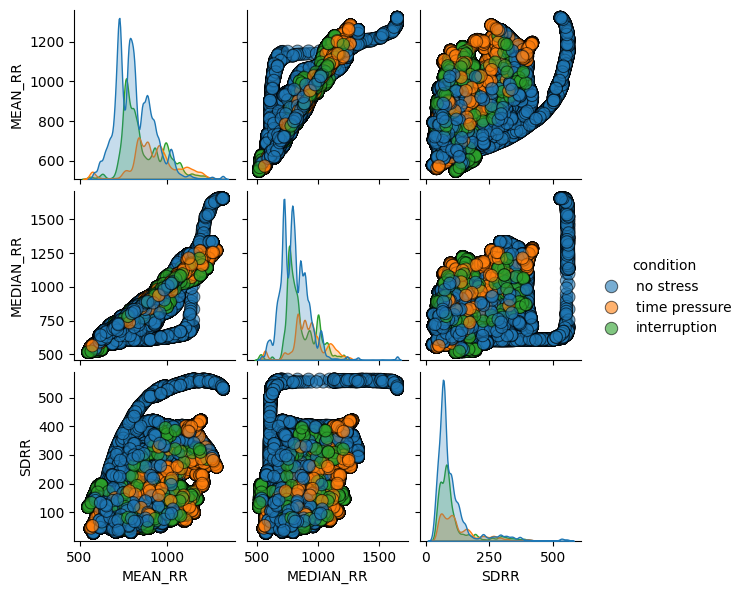

In [16]:
# Selecting a subset of features for clarity
subset_data = df[['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'condition']]

# Pair plot
sns.pairplot(subset_data, hue='condition', diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, size=2)
plt.show()


#Time-Domain Features of HRV

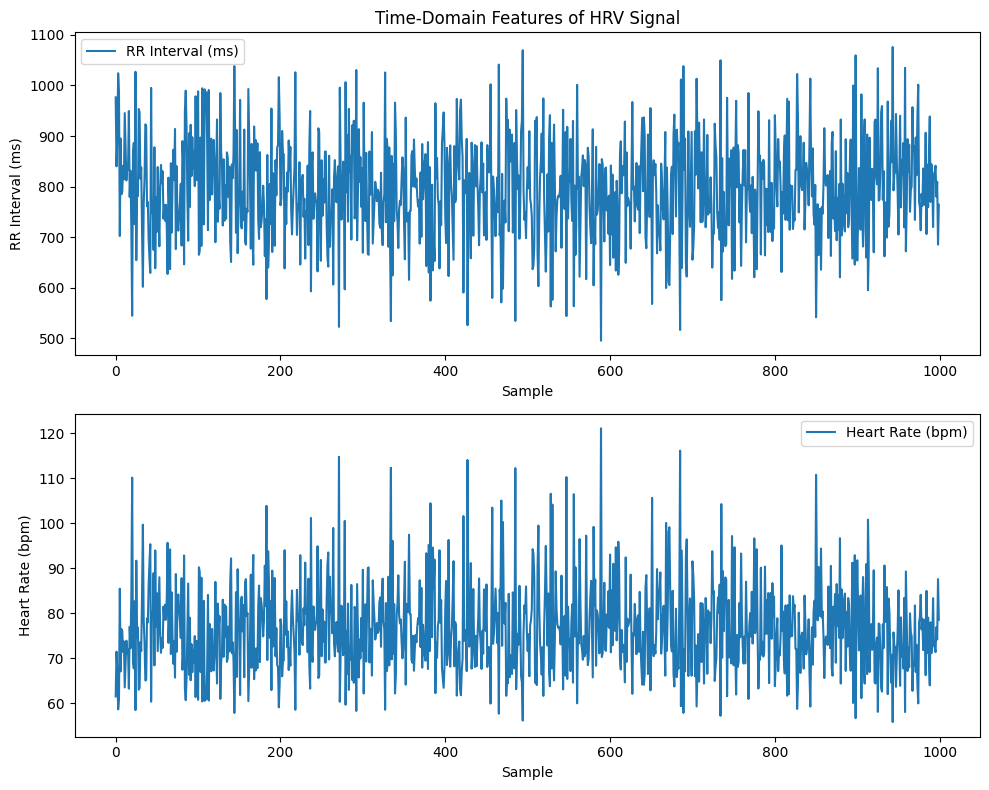

In [17]:
import matplotlib.pyplot as plt

# Sample HRV data (replace with your actual data)
# Generate synthetic data for demonstration
np.random.seed(0)
num_samples = 1000
# Time-domain: RR Interval
RR_intervals = np.random.normal(loc=800, scale=100, size=num_samples)
# Time-domain: Heart Rate (bpm)
heart_rate = 60000 / RR_intervals


# Plot Time-Domain Features of HRV
plt.figure(figsize=(10, 8))

# RR Interval Plot
plt.subplot(2, 1, 1)
plt.plot(RR_intervals, label='RR Interval (ms)')
plt.title('Time-Domain Features of HRV Signal')
plt.xlabel('Sample')
plt.ylabel('RR Interval (ms)')
plt.legend()

# Heart Rate Plot
plt.subplot(2, 1, 2)
plt.plot(heart_rate, label='Heart Rate (bpm)')
plt.xlabel('Sample')
plt.ylabel('Heart Rate (bpm)')
plt.legend()

plt.tight_layout()
plt.show()



#Frequency-Domain Features of HRV Signal

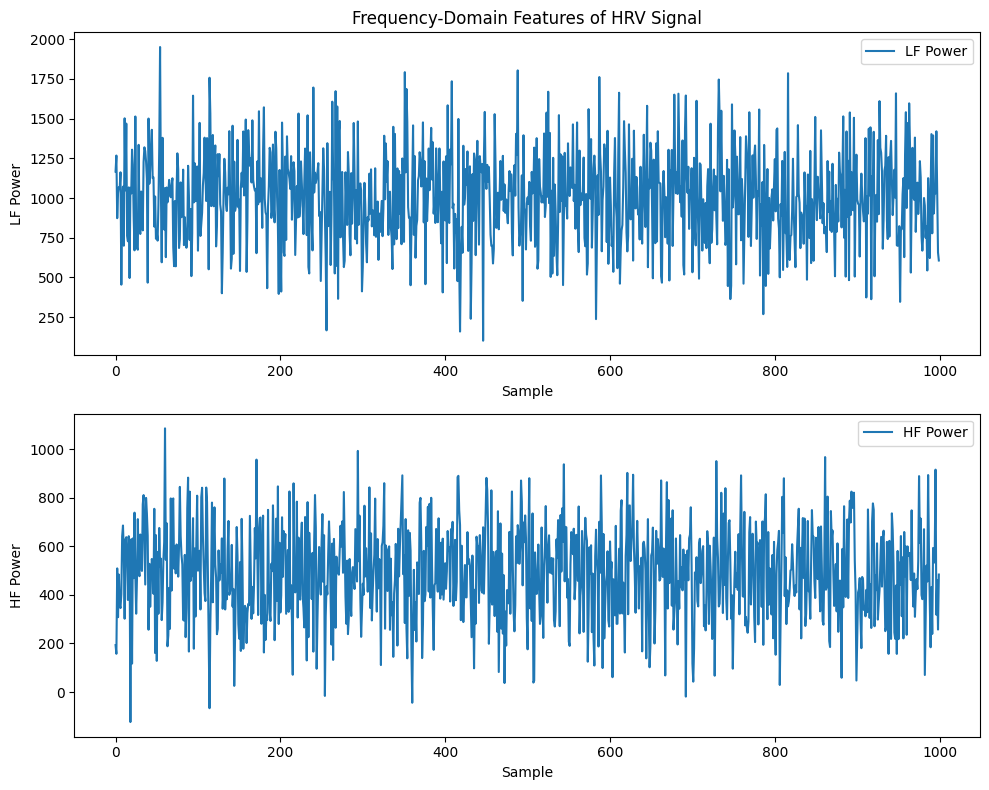

In [18]:
# Frequency-domain: LF Power
LF_power = np.random.normal(loc=1000, scale=300, size=num_samples)
# Frequency-domain: HF Power
HF_power = np.random.normal(loc=500, scale=200, size=num_samples)
# Plot Frequency-Domain Features of HRV
plt.figure(figsize=(10, 8))

# LF Power Plot
plt.subplot(2, 1, 1)
plt.plot(LF_power, label='LF Power')
plt.title('Frequency-Domain Features of HRV Signal')
plt.xlabel('Sample')
plt.ylabel('LF Power')
plt.legend()

# HF Power Plot
plt.subplot(2, 1, 2)
plt.plot(HF_power, label='HF Power')
plt.xlabel('Sample')
plt.ylabel('HF Power')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
df['condition'].value_counts()

,count
condition,
no stress,222240
interruption,116932
time pressure,71150


In [20]:
print(df['condition'].unique())

['no stress' 'time pressure' 'interruption']


# Bar chart show the distribution of different stress levels

<ipython-input-21-1674bf32eea7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['condition'], palette=['#1f77b4', '#ff7f0e', '#2ca02c'],order=['no stress','interruption','time pressure'])


<Axes: xlabel='condition', ylabel='count'>

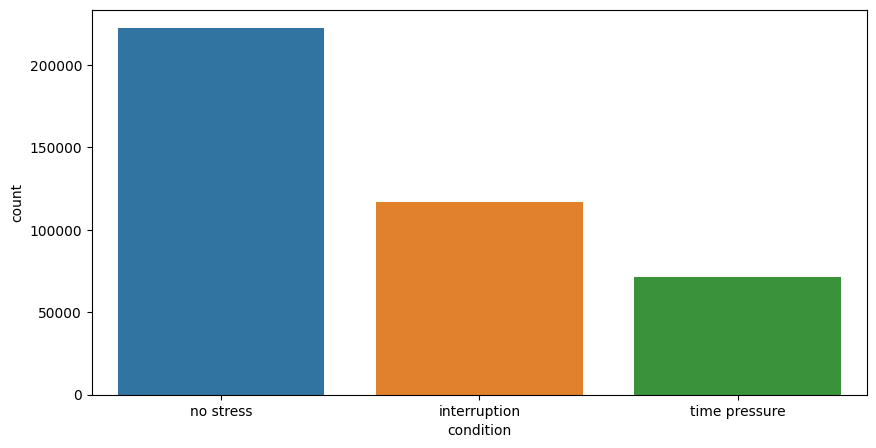

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x=df['condition'], palette=['#1f77b4', '#ff7f0e', '#2ca02c'],order=['no stress','interruption','time pressure'])

#Categorical Data Encoding -> sklearn label encoder

In [22]:
Categorical_cols=df.select_dtypes(include=['object']).columns

In [23]:
Categorical_cols

Index(['condition'], dtype='object')

In [24]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if df[cols].dtype == object:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals , " ----> Datatype: ", df[cols].dtypes)

Feature  condition  has  3  unique values ---->  ['no stress' 'time pressure' 'interruption']  ----> Datatype:  object


In [25]:
condition= { 'no stress':0, 'time pressure': 1,'interruption':2}
df['condition'] = df['condition'].replace(condition)



<ipython-input-25-76ce841636dc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition'] = df['condition'].replace(condition)


In [26]:
df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
count,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,...,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.0,410322.000000
mean,846.670724,841.980595,109.302941,14.978707,14.977976,7.393869,73.937573,9.845863,0.865656,10.594563,...,39.222254,1.615105,4.431293,3185.252565,116.097645,0.048481,2.062585,1.182327,2.0,0.743353
std,124.585711,132.286414,77.065738,4.122602,4.122605,5.144097,10.335769,8.202293,0.989847,2.916095,...,45.358572,1.760037,4.121246,1923.256646,361.579695,0.049200,0.207042,0.062222,0.0,0.872200
min,547.483802,517.293295,27.233947,5.529742,5.529630,2.660381,48.736986,0.000000,0.000000,3.911344,...,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,0.434576,1.033984,2.0,0.000000
25%,760.243974,755.749505,64.196632,11.831264,11.831056,4.539551,66.707281,3.666667,0.000000,8.368612,...,10.705803,0.346007,1.225656,1827.162419,14.740211,0.012409,2.033147,1.139945,2.0,0.000000
50%,822.916027,819.669975,82.624288,14.417202,14.416616,5.950217,74.217815,7.600000,0.466667,10.197489,...,24.827923,1.038836,3.355510,2797.183719,28.801728,0.034720,2.134297,1.174310,2.0,0.000000
75%,924.220881,917.009455,118.193410,17.931444,17.929922,7.918086,80.330105,13.333333,1.400000,12.682600,...,45.249947,2.244387,6.353155,4052.547021,80.588979,0.067842,2.181977,1.223704,2.0,2.000000
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.754253,39.400000,5.466667,18.836107,...,364.486936,13.095664,30.120917,13390.684100,7796.443096,0.431043,2.234841,1.361219,2.0,2.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410322 entries, 0 to 410321
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            410322 non-null  float64
 1   MEDIAN_RR          410322 non-null  float64
 2   SDRR               410322 non-null  float64
 3   RMSSD              410322 non-null  float64
 4   SDSD               410322 non-null  float64
 5   SDRR_RMSSD         410322 non-null  float64
 6   HR                 410322 non-null  float64
 7   pNN25              410322 non-null  float64
 8   pNN50              410322 non-null  float64
 9   SD1                410322 non-null  float64
 10  SD2                410322 non-null  float64
 11  KURT               410322 non-null  float64
 12  SKEW               410322 non-null  float64
 13  MEAN_REL_RR        410322 non-null  float64
 14  MEDIAN_REL_RR      410322 non-null  float64
 15  SDRR_REL_RR        410322 non-null  float64
 16  RM

#To perform the Shapiro-Wilk test on SWELL−KW dataset(normality tests)

In [28]:
import pandas as pd
from scipy import stats

# Set significance level
alpha = 0.05

# Test all features in the X_train dataset
for column in df.columns:
    # Perform Shapiro-Wilk test for each column (feature)
    stat, p_value = stats.shapiro(df[column])

    # Print the p-value for each feature
    print(f'{column}: p-value = {p_value}')

    # Interpretation of the result
    if p_value >= alpha:
        print(f'{column} follows a Gaussian distribution\n')
    else:
        print(f'{column} does not follow a Gaussian distribution\n')

MEAN_RR: p-value = 1.1836850726606453e-103
MEAN_RR does not follow a Gaussian distribution

MEDIAN_RR: p-value = 6.196139749966871e-115
MEDIAN_RR does not follow a Gaussian distribution

SDRR: p-value = 8.645397585797134e-174
SDRR does not follow a Gaussian distribution



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 410322.
  res = hypotest_fun_out(*samples, **kwds)


RMSSD: p-value = 5.79850373143557e-101
RMSSD does not follow a Gaussian distribution

SDSD: p-value = 5.727992192745915e-101
SDSD does not follow a Gaussian distribution

SDRR_RMSSD: p-value = 6.993231628376787e-182
SDRR_RMSSD does not follow a Gaussian distribution

HR: p-value = 2.1368989958793613e-86
HR does not follow a Gaussian distribution

pNN25: p-value = 1.840246740208231e-146
pNN25 does not follow a Gaussian distribution

pNN50: p-value = 4.8104523341135494e-157
pNN50 does not follow a Gaussian distribution

SD1: p-value = 5.727992185014903e-101
SD1 does not follow a Gaussian distribution

SD2: p-value = 8.071229660817901e-174
SD2 does not follow a Gaussian distribution

KURT: p-value = 3.344081222929591e-185
KURT does not follow a Gaussian distribution

SKEW: p-value = 1.1368643069654118e-131
SKEW does not follow a Gaussian distribution

MEAN_REL_RR: p-value = 1.2793617838345613e-134
MEAN_REL_RR does not follow a Gaussian distribution

MEDIAN_REL_RR: p-value = 5.101532660636

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


**here, we perform normality tests using methods, such
 as Shapir–Wilk, on each feature of the datasets and the
 results reveal that the data samples do not look like Gaussian**

#Normalization ( Standardization)

In [29]:
from sklearn.preprocessing import StandardScaler


# Initialize the standardscaler
scaler =StandardScaler()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform the data
data_normalized_array = scaler.fit_transform(df[numerical_cols])

# Convert the normalized array back into a DataFrame
data_normalized = pd.DataFrame(data_normalized_array, columns=numerical_cols, index=df.index)
print("Shape of X_train after normalization:", data_normalized.shape)


Shape of X_train after normalization: (410322, 36)


In [30]:
df=data_normalized

In [31]:
df.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,-1.001471,-0.867160,-0.448717,-0.634902,-0.634771,-0.262241,0.985346,-0.598922,-0.874536,-0.634771,...,0.603962,1.310635,1.293056,-0.772985,-0.295515,1.212967,0.167876,0.986284,0.0,-0.852274
1,-0.025140,0.018349,-0.659224,1.047925,1.048081,-0.848087,-0.237905,1.359882,-0.672484,1.048081,...,-0.280480,-0.279363,-0.671677,-0.429672,-0.157561,-0.641630,0.747143,1.088503,0.0,0.294253
2,0.897802,0.942581,0.305534,1.543689,1.543850,-0.227310,-0.973638,1.741889,0.943929,1.543850,...,-0.511421,-0.707314,-0.889265,0.594503,0.037004,-0.828406,0.746473,-0.600830,0.0,-0.852274
3,-0.175237,0.003820,0.110544,-0.777882,-0.777841,0.508343,0.038019,-0.623306,-0.335731,-0.777841,...,-0.477105,-0.567700,-0.260271,-0.172002,-0.241507,-0.279011,0.213861,-0.642416,0.0,-0.852274
4,-0.722096,-0.710875,0.449818,-0.393189,-0.393341,0.657848,0.788958,-0.477005,-0.201030,-0.393341,...,-0.088698,-0.541027,0.451553,1.104781,-0.279897,0.379396,-0.726395,-0.871540,0.0,1.440780
5,-0.120708,-0.040698,-0.612905,-0.582652,-0.582501,-0.477950,-0.133021,-0.647689,-0.605133,-0.582501,...,-0.258061,-0.190130,0.011992,-0.538813,-0.262127,-0.031955,0.557234,0.324902,0.0,0.294253
6,-0.110574,-0.058136,-0.315364,-0.201548,-0.201504,-0.269421,-0.108421,-0.298193,-0.874536,-0.201504,...,-0.539048,-0.580055,-0.702293,-0.363548,-0.143910,-0.668116,0.599251,0.026558,0.0,1.440780
7,-1.021234,-0.940834,-0.666076,-1.365125,-1.365029,-0.232167,0.968842,-0.997185,-0.739834,-1.365029,...,-0.103692,0.329488,1.103505,-0.838499,-0.293050,1.019660,0.642253,0.161251,0.0,-0.852274
8,1.212343,1.185895,-0.377437,1.731448,1.731614,-0.732289,-1.296470,2.075130,1.078630,1.731614,...,-0.667258,-0.777984,-0.949225,0.238210,0.208715,-0.879283,0.650173,0.682150,0.0,1.440780
9,-0.764849,-0.614528,-0.269467,-0.237516,-0.237610,-0.207935,0.695442,-0.379471,-0.268381,-0.237610,...,-0.156993,-0.351521,-0.328068,0.018941,-0.234035,-0.339641,0.041106,-0.684704,0.0,-0.852274


#Splitting data for training and testing as 80|20 for train|test datasets

In [32]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
x=df.drop('condition',axis=1)
y=df['condition']

In [33]:
## Split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape

(328257, 35)

In [35]:
#check missing value
missing_value=X_train.isnull().sum()
missing_value

,0
MEAN_RR,0
MEDIAN_RR,0
SDRR,0
RMSSD,0
SDSD,0
SDRR_RMSSD,0
HR,0
pNN25,0
pNN50,0
SD1,0


**Here, we can see that there are no missing values in X_train.**

<Axes: >

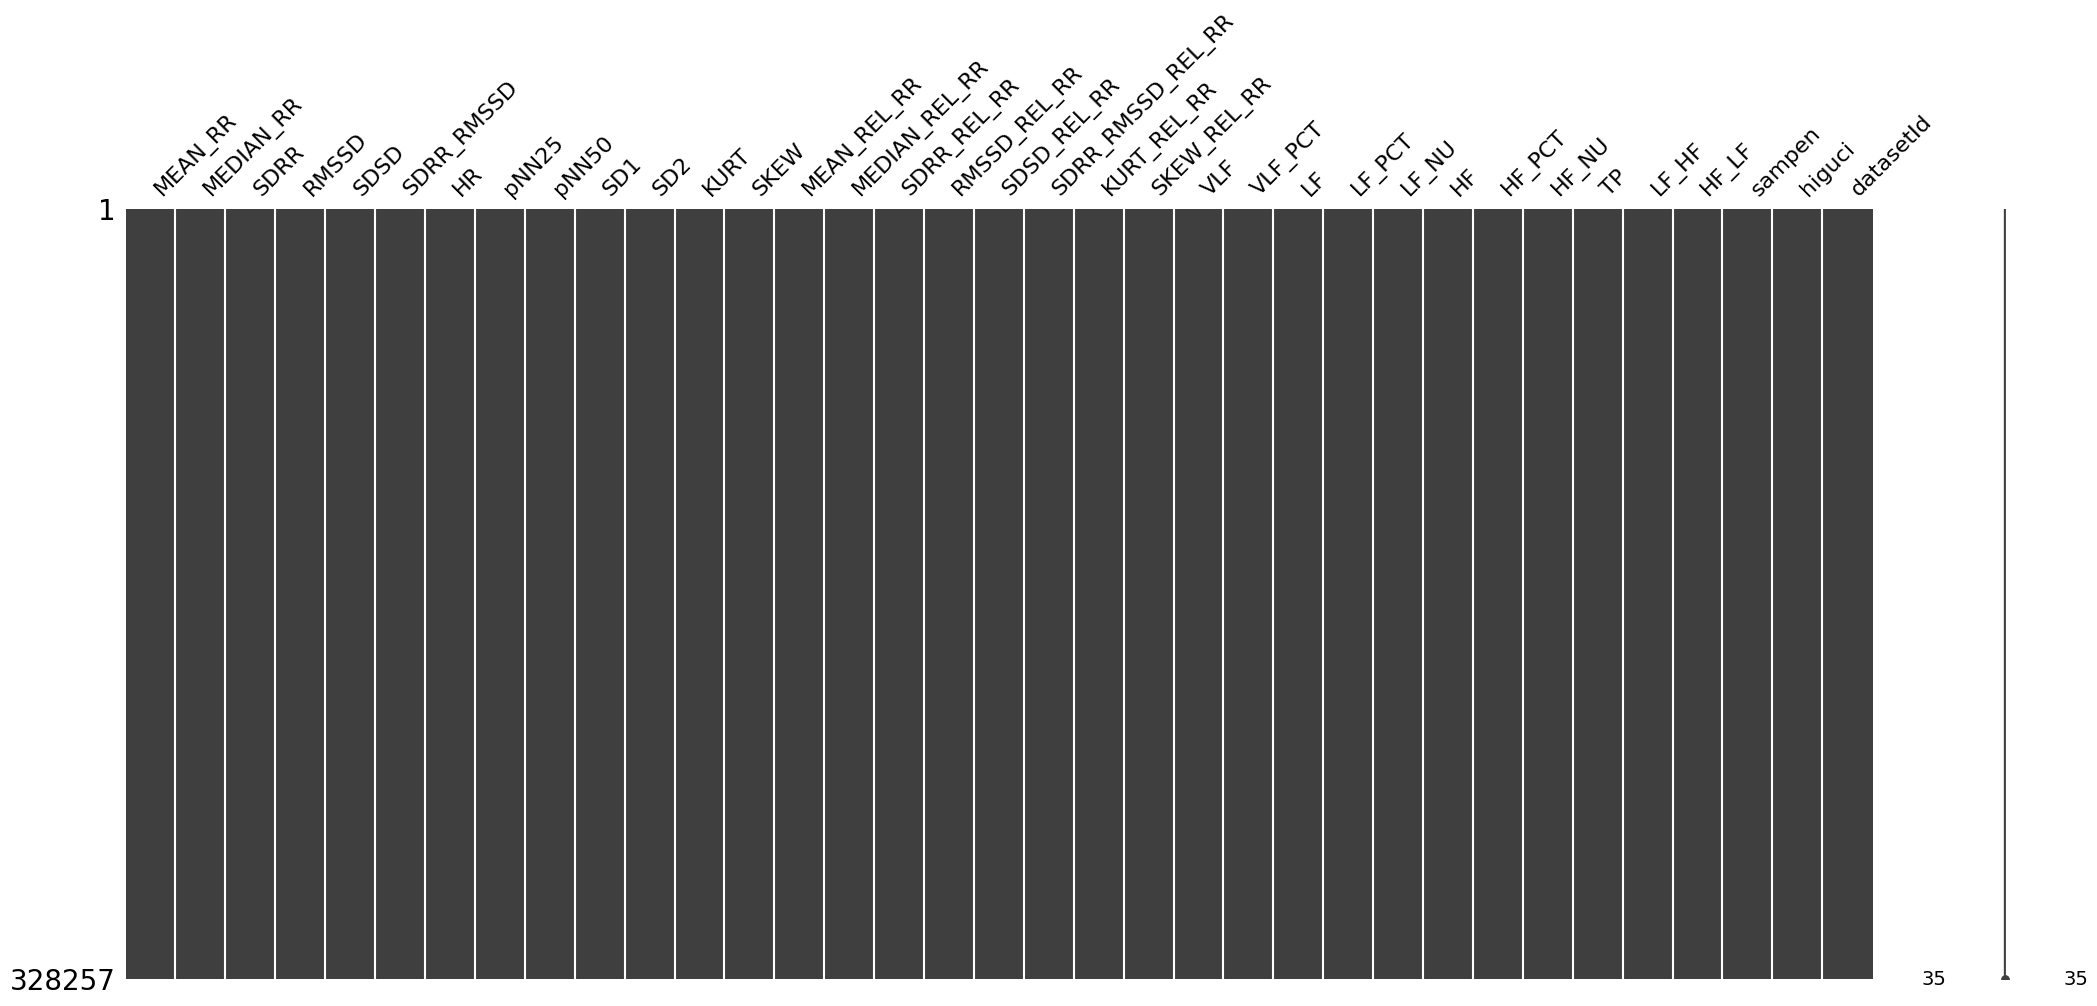

In [36]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(X_train)

#change datatype of train and test data

In [37]:
print("previous data types of train and test data samples")
print(X_train.dtypes)
print(X_test.dtypes)
X_train=X_train.astype('float64')
y_train=y_train.astype('float64')
X_test=X_test.astype('float64')
print("updated data types of train and test data samples")
print(X_train.dtypes)
print(y_train.dtypes)
print(X_test.dtypes)

previous data types of train and test data samples
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
SD1                  float64
SD2                  float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
sampen               

#Handling Outliers

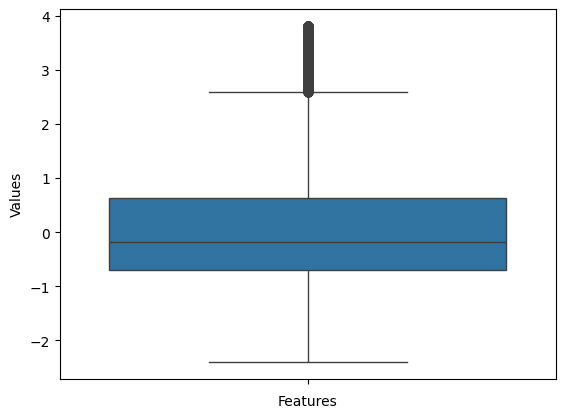

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot and capture the axes handle
ax = sns.boxplot(data=X_train['MEAN_RR'])

# Now you can use 'ax' to set labels
ax.set(xlabel='Features', ylabel='Values')
plt.show()

[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Values')]

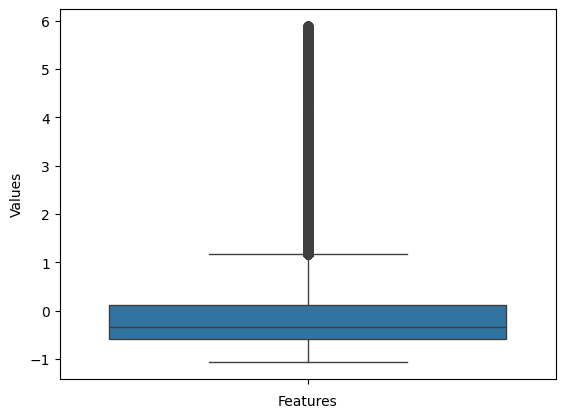

In [39]:
import seaborn as sns

ax = sns.boxplot(data = X_train['SDRR'])

ax.set(xlabel='Features', ylabel='Values')
# Save the figure as an image file
# plt.savefig("outliers.png")

In [40]:
#replacing outliers that lie more than 2 standard deviations away from the mean
data = X_train

for col in data.columns:
    mean = data[col].mean()
    sd = data[col].std()
    median = data[col].median()
    data[col].mask(data[col] > mean+(2*sd), median, inplace=True)
    data[col].mask(data[col] < mean-(2*sd), median, inplace=True)

<ipython-input-40-d1d864d349e8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].mask(data[col] > mean+(2*sd), median, inplace=True)
<ipython-input-40-d1d864d349e8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Values')]

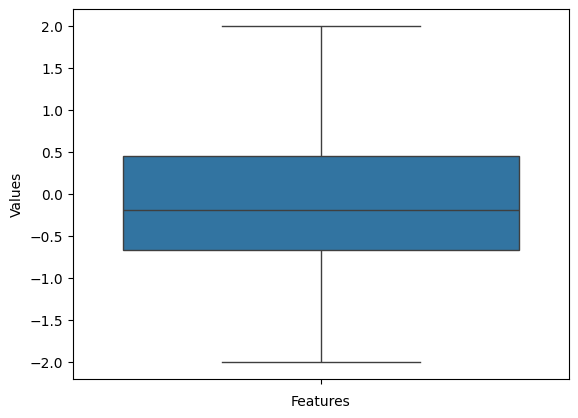

In [41]:
ax = sns.boxplot(data = data['MEAN_RR'])

ax.set(xlabel='Features', ylabel='Values')

#Reshape Train and Test data

In [42]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (328257, 35)
Shape of y_train: (328257,)


In [43]:
print("Shape of X_train:", X_test.shape)
print("Shape of y_train:", y_test.shape)

Shape of X_train: (82065, 35)
Shape of y_train: (82065,)


In [44]:
X_train.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId
51542,1.273130,1.189405,0.483712,0.701673,0.701849,0.157089,-1.251149,0.547100,0.472475,0.701849,...,0.993773,-0.773094,-0.863131,-0.993773,0.595554,0.499957,-0.916920,0.509155,-0.934127,0.0
350660,-0.386672,-0.282350,-0.053768,0.355983,0.355959,-0.194351,0.262547,0.360160,-0.268381,0.355959,...,0.787619,-0.406421,-0.551981,-0.787619,0.023216,-0.090527,-0.741575,0.180103,-0.993214,0.0
244806,-0.069249,0.013713,0.104415,0.006233,0.006385,0.083037,-0.080386,-0.452622,0.270424,0.006385,...,-0.103716,-0.095705,-0.457805,0.103716,0.584695,-0.266929,0.052589,-1.791922,0.963241,0.0
122291,0.564647,0.613817,-0.153586,0.733022,0.733191,-0.384762,-0.747375,0.522717,0.135723,0.733191,...,0.748372,-0.456916,-0.608643,-0.748372,0.112193,-0.118542,-0.707852,0.695896,0.158851,0.0
87871,0.635907,0.751321,-0.116177,0.736661,0.736789,-0.354530,-0.800608,0.425183,0.337774,0.736789,...,0.440076,-0.133694,-0.311281,-0.440076,-0.040738,-0.218196,-0.439047,0.083487,0.256042,0.0
373369,-1.236926,-1.013429,0.214516,0.163904,0.164065,0.125274,1.529505,-0.249426,0.472475,0.164065,...,-1.900791,1.899641,0.996258,1.900791,0.279230,-0.301301,1.855955,-0.189597,0.388584,0.0
12445,0.822154,0.523167,0.447166,0.658095,0.658224,0.142333,-0.901389,0.579611,0.472475,0.658224,...,0.915234,-0.667049,-0.789710,-0.915234,0.414024,0.095572,-0.850472,0.158263,-0.881809,0.0
4465,0.760524,0.640133,0.224145,0.489273,0.489438,0.010434,-0.877217,0.482078,0.203073,0.489438,...,0.969415,-0.748011,-0.846331,-0.969415,0.536413,0.310329,-0.896358,0.583819,-0.895044,0.0
394668,0.656946,0.609876,-0.568327,-0.687655,-0.687502,-0.388756,-0.871063,-0.785862,-0.739834,-0.687502,...,0.645750,-0.654446,-0.634850,-0.645750,-0.659872,-0.167599,-0.619148,0.422000,0.019137,0.0
96866,0.387584,0.448782,-0.381730,-0.619976,-0.619799,-0.187278,-0.610845,-0.517644,-0.605133,-0.619799,...,0.759762,-0.701469,-0.766465,-0.759762,-0.209332,-0.111130,-0.717650,-0.156731,-1.184309,0.0


In [45]:
# Reshape X_train for 1D CNN
# Import to_categorical from tensorflow
#https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
from tensorflow.keras.utils import to_categorical

#X_train.shape[0]=the number of samples,X_train.shape[1]=the number of features for each sample
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)  # Add 1 channel (feature dimension)


# Now use to_categorical on the encoded labels
y_train_reshaped = to_categorical(y_train, num_classes=3)
print(y_train_reshaped)

# Similarly reshape X_test
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Now use to_categorical on the encoded labels
y_test_reshaped = to_categorical(y_test, num_classes=3)
print(y_test_reshaped)

# Print the new shapes for 1D CNN
print("Reshaped X_train for 1D CNN:", X_train_reshaped.shape)
print("Reshaped y_train for 1D CNN:", y_train_reshaped.shape)
print("Reshaped X_test for 1D CNN:", X_test_reshaped.shape)
print("Reshaped y_test for 1D CNN:", y_test_reshaped.shape)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Reshaped X_train for 1D CNN: (328257, 35, 1)
Reshaped y_train for 1D CNN: (328257, 3)
Reshaped X_test for 1D CNN: (82065, 35, 1)
Reshaped y_test for 1D CNN: (82065, 3)


# Compile Model and Training

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
!pip install scikit-learn
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import time



# Build a simple 1D CNN model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))

model.add(Dense(16, activation='relu'))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=1))

# Flatten the output to feed it into Dense layers
model.add(Flatten())


# Output layer (for classification, assuming 3 classes)
model.add(Dense(3, activation='softmax'))
optimizer = Adam(learning_rate=0.001)

# Instantiate CategoricalCrossentropy with label smoothing
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

# Specify the loss function object in model.compile
model.compile(optimizer=optimizer,
              loss=loss_fn, # Pass the loss function object
              metrics=['accuracy'])
start_time = time.time()

# Train the model
history=model.fit(X_train_reshaped, y_train_reshaped, epochs=140, batch_size=32, validation_split=0.05)

end_time = time.time()
# Calculate total execution time
execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8320 - loss: 0.5650 - val_accuracy: 0.9394 - val_loss: 0.4180
Epoch 2/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9476 - loss: 0.4075 - val_accuracy: 0.9653 - val_loss: 0.3821
Epoch 3/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9677 - loss: 0.3814 - val_accuracy: 0.9759 - val_loss: 0.3707
Epoch 4/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9754 - loss: 0.3704 - val_accuracy: 0.9808 - val_loss: 0.3625
Epoch 5/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9798 - loss: 0.3642 - val_accuracy: 0.9814 - val_loss: 0.3627
Epoch 6/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9820 - loss: 0.3609 - val_accuracy: 0.9793 - val_loss: 0.3637
Epoch 7/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9834 - loss: 0.3585 - val_accuracy: 0.9826 - val_loss: 0.3611
Epoch 8/140
9746/9746 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9844 -

**Here, we observe that after successfully completing 140 epochs, the model achieved an accuracy of 0.9968, with a loss of 0.3260. The validation accuracy reached 0.9972, and the validation loss was 0.3268. The total execution time was 5137.04159 seconds**

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 34, 64)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 34, 16)              │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 34, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,635 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,603 (33.61 KB)

 Trainable params: 2,867 (11.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,736 (22.41 KB)

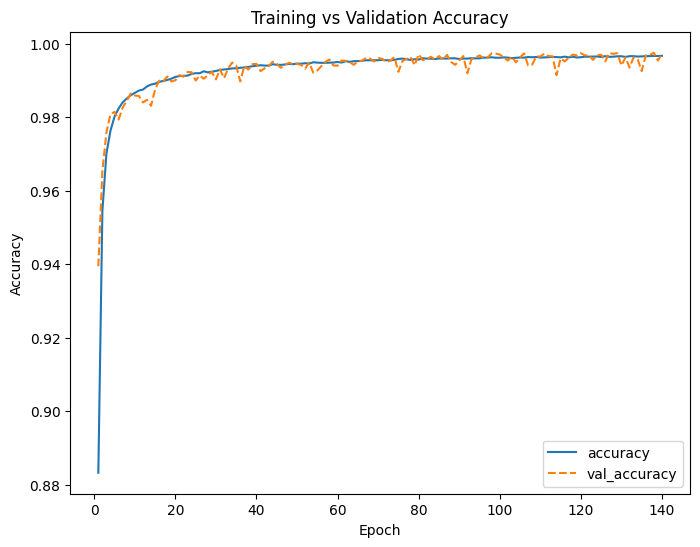

In [48]:
# Accessing training history from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)  # Create a range of epoch numbers

# Plotting the accuracy values
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, linestyle='--', label='val_accuracy')

# Adding title and labels
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.show()

# Model Evaluation

In [49]:
# Model Evaluation
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix


# Get predictions
Y_pred = model.predict(X_test_reshaped)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# True labels
Y_true = np.argmax(y_test_reshaped, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_true, Y_pred_classes)
precision = precision_score(Y_true, Y_pred_classes, average='macro')
recall = recall_score(Y_true, Y_pred_classes, average='macro')
f1 = f1_score(Y_true, Y_pred_classes, average='macro')
mcc = matthews_corrcoef(Y_true, Y_pred_classes)

# Confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"MCC: {mcc}")
print(f"Confusion Matrix:\n{conf_matrix}")

2565/2565 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy: 0.9425455431670018
Precision: 0.9289477464557405
Recall: 0.930406457466546
F1-score: 0.9296728749707177
MCC: 0.8593529658767076
Confusion Matrix:
[[56230  2424]
 [ 2291 21120]]


**After completing the model evaluation, the results were as follows: Accuracy: 0.9425, Precision: 0.9289, Recall: 0.9304, F1-score: 0.9296, and MCC: 0.8593**
